In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import CountVectorizer
from itertools import chain
from collections import Counter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('punkt')

from gensim.models import KeyedVectors
from gensim.downloader import load

glove_model = load('glove-wiki-gigaword-50')
#fast_text_model = KeyedVectors.load_word2vec_format("data/wiki-news-300d-1M.vec", binary=False)

from sentence_transformers import SentenceTransformer, util

# Load model
bert_model = SentenceTransformer('all-MiniLM-L6-v2')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Christian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Christian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('data/wiki_movie_plots_deduped.csv')
df = df.drop(columns=['Director', 'Cast', 'Wiki Page'])
df.head(3)

,Release Year,Title,Origin/Ethnicity,Genre,Plot
0,1901,Kansas Saloon Smashers,American,unknown,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,unknown,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,unknown,"The film, just over a minute long, is composed..."


In [3]:
df_known = pd.read_excel('data/Known_Plots.xlsx')
df_known.head(3)

,Drama,Romance,Comedy
0,"In 1947, Portland, Maine, banker Andy Dufresne...",In 1981 a feather lands at a bus stop in Savan...,"A group of lazy, ignorant highschool students,..."
1,"In 1945, the don of New York City's Corleone f...","Part I In 1939, in Fascist Italy, young Italia...","At night in Paris, Driss is driving Philippe's..."
2,A gang of masked criminals rob a mafia-owned b...,"On Christmas Eve 1945, in Bedford Falls, New Y...",A Labrador puppy escapes from the house of a b...


In [4]:
comedic_plots = df_known['Comedy'].tolist()
dramatic_plots = df_known['Drama'].tolist()
romantic_plots = df_known['Romance'].tolist()

In [5]:
def similarity_to_genres(plot):

    dramatic_plots_check = [plot] + dramatic_plots

    embeddings = bert_model.encode(dramatic_plots_check)
    similarities = bert_model.similarity(embeddings, embeddings)
    col0 = similarities[:, 0]
    sim1 = 0
    for i in range(1, len(col0)):
        sim1 += float(col0[i])

    romantic_plots_check = [plot] + romantic_plots

    embeddings = bert_model.encode(romantic_plots_check)
    similarities = bert_model.similarity(embeddings, embeddings)
    col0 = similarities[:, 0]
    sim2 = 0
    for i in range(1, len(col0)):
        sim2 += float(col0[i])

    comedic_plots_check = [plot] + comedic_plots

    embeddings = bert_model.encode(comedic_plots_check)
    similarities = bert_model.similarity(embeddings, embeddings)
    col0 = similarities[:, 0]
    sim3 = 0
    for i in range(1, len(col0)):
        sim3 += float(col0[i])

    return [sim1, sim2, sim3]


for i in range(1000, 1005):
    print(similarity_to_genres(df.iloc[i]['Plot']),  df.iloc[i]['Genre'])

[1.4986118823289871, 1.4646384567022324, 1.4289607554674149] drama
[0.9007470570504665, 1.0768744498491287, 0.9658688753843307] operetta
[1.05909775942564, 1.2985047921538353, 1.1379478797316551] romance
[1.2581246942281723, 1.3978853076696396, 1.0343096479773521] western
[1.7612929493188858, 1.7869844436645508, 1.4383519366383553] adventure


In [6]:
n = 500 
df_sample = df.head(n)

labels = df_sample['Genre'].values

In [7]:
X = np.zeros((n, 3))


for i, plot in enumerate(df_sample['Plot']):
    X[i] = similarity_to_genres(plot)



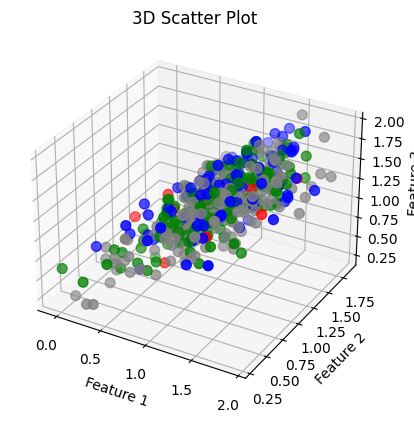

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting
import matplotlib.colors as mcolors

# Example: X has shape (n_samples, 3) and labels is a list of categories
# X = np.random.rand(100, 3)
# labels = ['romance', 'comedy', 'drama', ...]  

color_map = {
    'romance': 'red',
    'comedy': 'blue',
    'drama': 'green'
}
default_color = 'gray'

mapped_colors = [mcolors.to_hex(color_map.get(g, default_color)) for g in labels]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=mapped_colors, s=50)  # s controls marker size
ax.set_title("3D Scatter Plot")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

plt.show()

In [9]:
print(X)

[[1.0537868  0.78525858 0.7606204 ]
 [0.51522677 0.53407694 1.0181415 ]
 [0.93105113 1.07255565 0.92966061]
 ...
 [0.66589622 0.6460698  0.58366857]
 [0.4523291  0.88965667 1.17587115]
 [0.05220678 0.38855342 0.24392139]]
